In [1]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [2]:
with open(f'Step1a/dataframes/{1}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,2,1,1.763492e+09,1.763492e+09,"[18.04, 45.66, 45.28, 45.28, 45.2, 45.13, 45.0...",775,1,5
1,3,1,1.763492e+09,1.763492e+09,"[76.1, 9.96, 10.34, 10.41, 10.11, 10.49, 11.1,...",775,1,5
2,4,1,1.763492e+09,1.763492e+09,"[146.98, 20.26, 19.34, 19.49, 19.8, 21.1, 20.2...",775,1,5
3,5,1,1.763492e+09,1.763492e+09,"[32.77, 4.92, 6.75, 6.37, 6.68, 7.74, 7.82, 7....",775,1,5
4,1,2,1.763492e+09,1.763492e+09,"[10.34, 29.95, 28.88, 28.65, 29.03, 28.8, 29.6...",775,1,5


In [3]:
df.to_csv("delme.csv")

In [4]:
# #correction only remove later
# corrected_df=pd.DataFrame(columns=["Rx","Tx", "MPP Start Time (s)",
#                             "MPP Stop Time (s)","Voltages (mV)",
#                             "Frequency (MHz)", "Run Exp Num"])

# for idx in range(df.shape[0]):
#     corrected_df=pd.concat([corrected_df,pd.DataFrame([df.iloc[idx][0]])],ignore_index=True)
#     corrected_df=pd.concat([corrected_df,pd.DataFrame([df.iloc[idx][1]])],ignore_index=True)
    

In [5]:
# df=corrected_df
df["NumMPPs"]=5
# df

In [6]:
print(len(df))

460


KeyboardInterrupt: 

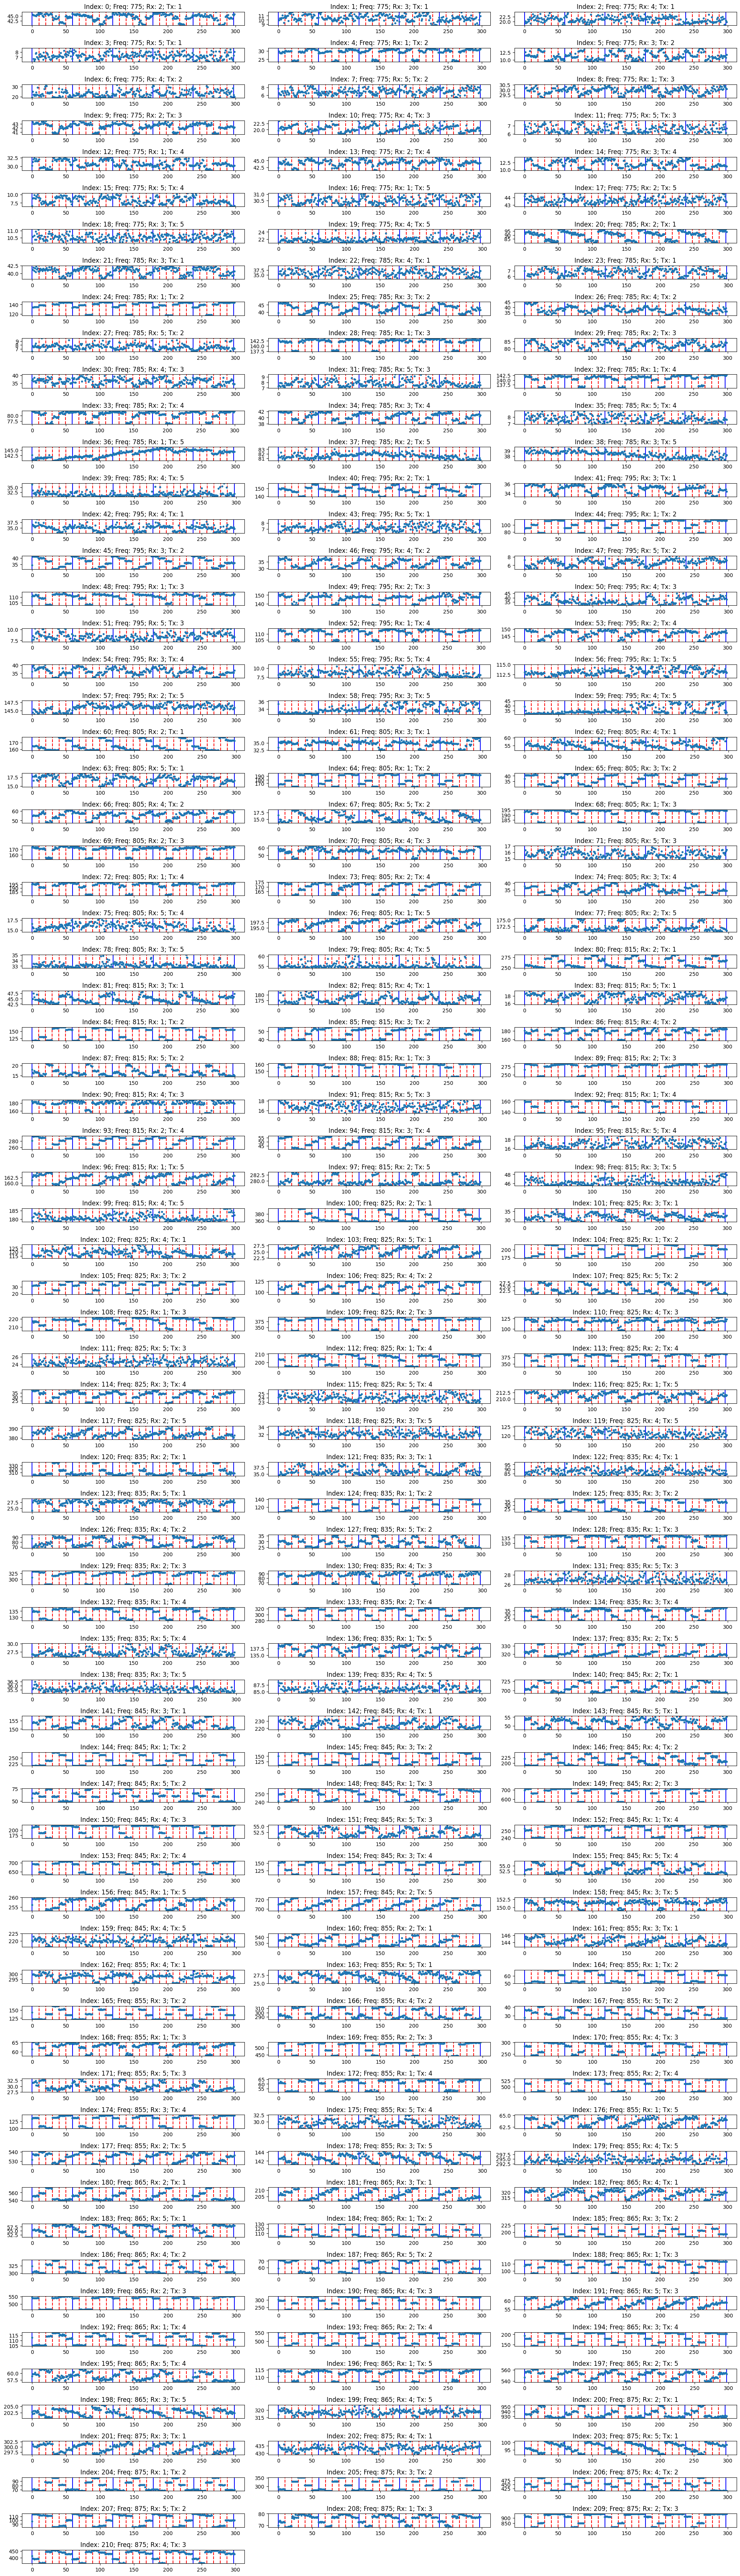

In [9]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=int(df.iloc[0]['NumMPPs'])
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(20,150))
for df_idx in range(len(df)):
# for df_idx in range(69,(69+5)):
    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    # bad=False
    # for k in phase_medians.keys():
    #     assert(len(phase_medians[k])==num_mpps)
    #     if np.std(phase_medians[k])>1:
    #         print(f"Bad data found at {df_idx} df_idx at phase {k}.")
    #         print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.ylim([np.percentile(voltages,1), np.percentile(voltages,99)])
        plt.plot(voltages,'.')
        plt.title(f"Index: {df_idx}; Freq: {df.iloc[df_idx]['Frequency (MHz)']}; Rx: {df.iloc[df_idx]['Rx']}; Tx: {df.iloc[df_idx]['Tx']}")
        plt.tight_layout()
    # break
        
if plotting:
    plt.show()
    
    

In [8]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,2,3,"[173.3, 175.21, 172.92, 172.69, 173.61, 171.7,...","[173.3, 173.955, 173.685, 172.805, 173.685]","[171.36, 171.435, 170.445, 171.20999999999998,...","[154.575, 153.585, 153.925, 153.77, 153.505]","[170.785, 169.605, 169.60000000000002, 169.53,...","[174.945, 171.7, 172.275, 171.93, 171.51]","[174.56, 172.885, 172.73000000000002, 173.155,...",805,1,5
1,4,3,"[59.09, 57.56, 55.43, 58.79, 55.89, 57.87, 55....","[57.56, 58.480000000000004, 56.760000000000005...","[54.325, 54.665, 54.36, 56.0, 54.55]","[45.66, 46.655, 45.855000000000004, 46.43, 46....","[56.760000000000005, 56.155, 55.66, 55.73, 54.82]","[60.465, 56.88, 55.769999999999996, 56.9899999...","[60.730000000000004, 56.8, 56.65, 55.735, 62.715]",805,1,5
2,5,3,"[14.38, 16.37, 15.6, 15.83, 16.06, 15.45, 15.6...","[15.6, 16.325000000000003, 15.53, 15.83, 16.06]","[15.489999999999998, 16.14, 16.29, 15.985, 15....","[16.25, 15.945, 15.945, 15.6, 15.795]","[15.565, 15.375, 15.22, 15.375, 15.3]","[16.44, 15.37, 15.485, 15.489999999999998, 15.3]","[16.21, 15.335, 15.22, 15.22, 15.905000000000001]",805,1,5
3,1,4,"[195.05, 195.74, 195.35, 194.82, 195.51, 194.4...","[195.35, 195.74, 195.43, 195.51, 195.24]","[191.005, 191.26999999999998, 192.305, 191.615...","[180.55, 181.62, 180.59, 181.39, 180.475000000...","[193.29, 194.515, 194.745, 194.44, 193.1]","[196.235, 196.73, 196.845, 196.075, 195.39]","[197.145, 197.14499999999998, 196.535, 196.0, ...",805,1,5
4,2,4,"[174.22, 174.68, 173.91, 174.37, 175.06, 173.5...","[174.53, 174.64, 174.64, 174.68, 174.49]","[173.075, 172.85, 173.04000000000002, 173.265,...","[161.59500000000003, 162.55, 161.555, 161.25, ...","[166.97, 169.11, 167.43, 166.9, 166.4]","[170.825, 171.24, 171.02, 170.63, 170.405]","[173.15, 172.845, 173.0, 172.62, 172.464999999...",805,1,5
